In [16]:
%%capture
!pip install tweet-preprocessor
!pip install transformers
!pip install datasets

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/FinalBalancedDataset.csv")

In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [6]:
import preprocessor as p
for i,v in enumerate(df["tweet"]):
    df.loc[i,"text"] = p.clean(df["tweet"][i])
df

,Toxicity,tweet,text
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i can't use cause they don't...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur!!!
4,0,factsguide: society now #motivation,factsguide: society now
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf***in lie &;: right! His TL is t...
56741,1,"you've gone and broke the wrong heart baby, an...","you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [7]:
df.rename(columns = {'Toxicity':'label'}, inplace = True)
df

,label,tweet,text
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i can't use cause they don't...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur!!!
4,0,factsguide: society now #motivation,factsguide: society now
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf***in lie &;: right! His TL is t...
56741,1,"you've gone and broke the wrong heart baby, an...","you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [8]:
df.drop(columns = ['tweet'], inplace = True)
df

,label,text
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for credit i can't use cause they don't...
2,0,bihday your majesty
3,0,i love u take with u all the time in ur!!!
4,0,factsguide: society now
...,...,...
56740,1,you's a muthaf***in lie &;: right! His TL is t...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [11]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,label,text
39938,1,Beefin ova bitches trade ya clip for Pom Poms
46951,1,: you're all pussies. Only men throw whammers ...
3773,0,if you are suffering from try salmon:
11132,0,mums the word! !
38232,1,joey r u a retard its about the defense and we...
...,...,...
16626,0,getting ready to hear from dr. terrell strayhorn!
21687,0,forever sad. forever apathetic. forever alone.
5872,0,nooooo running out of yellow chilies tag ur your
22443,0,mainstream american news at its finest... they...


<Axes: xlabel='label', ylabel='count'>

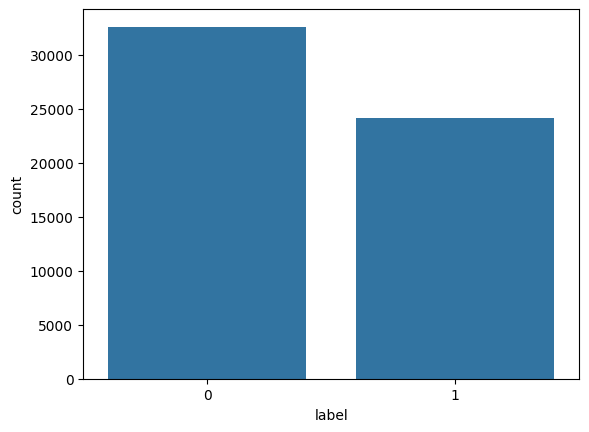

In [12]:
import seaborn as sns
sns.countplot(x="label", data=df)

In [13]:
df["text"] = df["text"].str.lower()

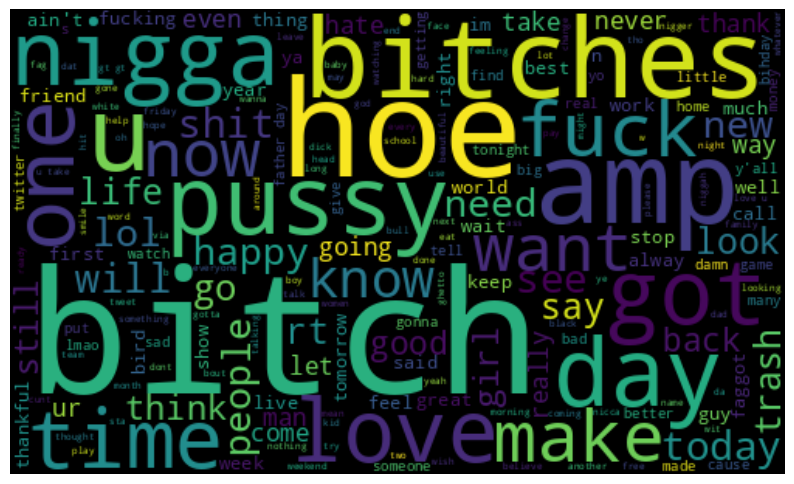

In [14]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ' '.join([txt for txt in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize = (10, 8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

train, tst = train_test_split(df, test_size=0.2, shuffle=True)
valid, test = train_test_split(tst, test_size=0.5)

In [17]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

import numpy as np
import torch
from datasets import Dataset,DatasetDict,load_dataset

In [18]:
PRETRAINED = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [19]:
def encode(docs):
  encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length', return_attention_mask=True, truncation=True, return_tensors='pt')
  input_ids = encoded_dict['input_ids']
  attention_masks = encoded_dict['attention_mask']
  return input_ids, attention_masks

In [20]:
train_input_ids, train_att_masks = encode(train['text'].values.tolist())
valid_input_ids, valid_att_masks = encode(valid['text'].values.tolist())
test_input_ids, test_att_masks = encode(test['text'].values.tolist())

In [21]:
train_y = torch.LongTensor(train['label'].values.tolist())
valid_y = torch.LongTensor(valid['label'].values.tolist())
test_y = torch.LongTensor(test['label'].values.tolist())
train_y.size(),valid_y.size(),test_y.size()

(torch.Size([45396]), torch.Size([5674]), torch.Size([5675]))

In [22]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 32
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [23]:
labels = len(train.label.unique())
model = AutoModelForSequenceClassification.from_pretrained(PRETRAINED, num_labels=labels,output_attentions=False,output_hidden_states=False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [25]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

EPOCHS = 4
LEARNING_RATE = 1e-5

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

In [27]:
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))

    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()

            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(valid) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/1419 [00:00<?, ?it/s]

Validation:   0%|          | 0/178 [00:00<?, ?it/s]

1419/1419 train loss: 0.19794824519972407 
178/178 val loss: 0.16691956080998596 
Epoch:  2


Training:   0%|          | 0/1419 [00:00<?, ?it/s]

Validation:   0%|          | 0/178 [00:00<?, ?it/s]

1419/1419 train loss: 0.1273634072620923 
178/178 val loss: 0.16038594338938258 
Epoch:  3


Training:   0%|          | 0/1419 [00:00<?, ?it/s]

Validation:   0%|          | 0/178 [00:00<?, ?it/s]

1419/1419 train loss: 0.0914585391283324 
178/178 val loss: 0.17495963210501614 
Epoch:  4


Training:   0%|          | 0/1419 [00:00<?, ?it/s]

Validation:   0%|          | 0/178 [00:00<?, ?it/s]

1419/1419 train loss: 0.06751353474900945 
178/178 val loss: 0.20830463704174343 


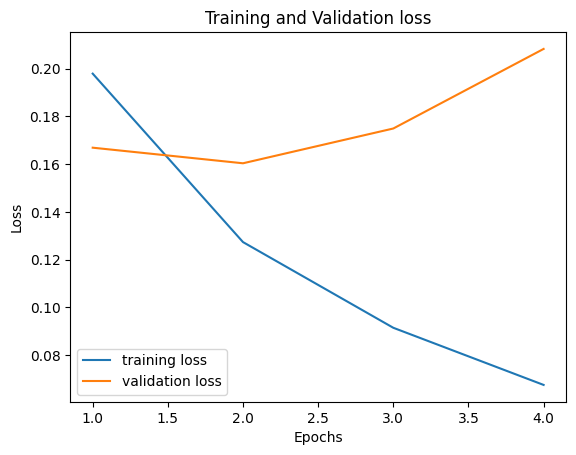

In [28]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [29]:
model.eval()
test_pred = []
test_loss= 0
with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss += loss.item()

        test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
test_pred = np.concatenate(test_pred)

0it [00:00, ?it/s]

In [30]:
from sklearn.metrics import classification_report
label_names = ['non-toxic','toxic']
print(classification_report(test_pred, test['label'].to_numpy(),target_names=label_names))

              precision    recall  f1-score   support

   non-toxic       0.96      0.95      0.96      3314
       toxic       0.94      0.95      0.94      2361

    accuracy                           0.95      5675
   macro avg       0.95      0.95      0.95      5675
weighted avg       0.95      0.95      0.95      5675



In [31]:
test['pred'] = test_pred
test.reset_index(level=0)
print(test[test['label']!=test['pred']].shape)
test[test['label']!=test['pred']][['text','label','pred']].head(10)

(282, 3)


,text,label,pred
30222,gotta love what a giant slobbering vicious mut...,0,1
50947,": before covering up misdeeds, creepy little l...",1,0
7536,bitch i wish my bestfriend would come back on ...,0,1
35519,niger,1,0
3100,"""the holidays are a violent time for me, and i...",1,0
47968,: lewis so trash lmao,0,1
20977,ya he is a real winner,1,0
18747,not to sound but has her looks to fall back on...,1,0
22094,this obviously gets on &amp; maybe two seconds...,1,0
50021,: &;kobe&; as they shoot a piece of paper into...,1,0


In [32]:
model.push_to_hub("bert-base-uncased-toxicity")

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/selimyagci/bert-base-uncased-toxicity/commit/f7628ec980fa524c439f4bee149a39a708bf6295', commit_message='Upload BertForSequenceClassification', commit_description='', oid='f7628ec980fa524c439f4bee149a39a708bf6295', pr_url=None, repo_url=RepoUrl('https://huggingface.co/selimyagci/bert-base-uncased-toxicity', endpoint='https://huggingface.co', repo_type='model', repo_id='selimyagci/bert-base-uncased-toxicity'), pr_revision=None, pr_num=None)